In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set(style='darkgrid')



import matplotlib.pyplot as plt
%matplotlib inline

import gc

import warnings
warnings.filterwarnings('ignore')

import json
from pandas.io.json import json_normalize

#!pip install nltk
import nltk

In [11]:
plt.rcParams["patch.force_edgecolor"] = False

In [2]:
#!pip install progressbar
#from progressbar import ProgressBar

In [3]:
## reviews from some Home Decor retail company
with open("turnto-ugc.js",encoding="utf8") as datafile:
    data = json.load(datafile)

In [4]:
type(data)

dict

In [5]:
data.keys()
#pd.DataFrame.from_dict(data,orient='index').transpose()

dict_keys(['exportStart', 'site', 'dateCreated', 'questions', 'comments', 'reviews', 'exportEnd'])

In [6]:
for key in data.keys():
    print(key,':',type(data[key]),':',len(data[key]))

exportStart : <class 'str'> : 8
site : <class 'str'> : 6
dateCreated : <class 'str'> : 25
questions : <class 'list'> : 0
comments : <class 'list'> : 54894
reviews : <class 'list'> : 147512
exportEnd : <class 'str'> : 8


In [17]:
for key in data['comments'][0].keys():
    print(key,':',type(data['comments'][0][key]))


id : <class 'int'>
user : <class 'dict'>
item : <class 'dict'>
text : <class 'str'>
tags : <class 'NoneType'>
dateTime : <class 'str'>


In [ ]:
# run line by line to understand

# df_comments = pd.DataFrame(data['comments'])
# df_comments.info()
# df_items = df_comments.item
# df_items[0]
# comments_item_df = pd.DataFrame()

# for i in df_items.keys():
#     x1 = pd.DataFrame.from_dict(df_items[i],orient='index').transpose()
#     comments_item_df = comments_item_df.append(x1)


In [18]:
for key in data['reviews'][0].keys():
    print(key,':',type(data['reviews'][0][key]))

id : <class 'int'>
user : <class 'dict'>
item : <class 'dict'>
title : <class 'str'>
text : <class 'str'>
rating : <class 'int'>
upVotes : <class 'int'>
downVotes : <class 'int'>
locale : <class 'str'>
published : <class 'str'>
publishedDate : <class 'str'>
tags : <class 'NoneType'>
dateTime : <class 'str'>
customDimensions : <class 'list'>
incentivized : <class 'bool'>
media : <class 'list'>


In [30]:
data['comments'][0]

{'id': 13913327,
 'user': {'firstName': 'Yona', 'lastName': 'Rozen', 'nickName': None},
 'item': {'sku': '3761390',
  'brand': 'Pier 1',
  'title': 'Tall White Knob Texture Vase',
  'questionCount': 0,
  'answerCount': 0,
  'reviewCount': 3,
  'commentCount': 3,
  'averageRating': 5},
 'text': "price and don't need a lot of flowers to fill",
 'tags': None,
 'dateTime': '2019-02-24T16:50:23+0000'}

In [31]:
comments_df = pd.DataFrame()

SKU = []
review_count = []
comment_count = []
avg_rating = []
title = []
text = []

from progressbar import ProgressBar
pbar = ProgressBar()

for i in pbar(data['comments']):
    SKU.append(i['item']['sku'])
    review_count.append(i['item']['reviewCount'])
    comment_count.append(i['item']['commentCount'])
    avg_rating.append(i['item']['averageRating'])
    title.append(i['item']['title'])
    text.append(i['text'])

comments_df['SKU'] = SKU
comments_df['review_count'] = review_count
comments_df['comment_count'] = comment_count
comments_df['avg_rating'] = avg_rating
comments_df['title'] = title
comments_df['text'] = text



100% |########################################################################|


In [32]:
#comments_df.items
comments_df.head()

,SKU,review_count,comment_count,avg_rating,title,text
0,3761390,3,3,5,Tall White Knob Texture Vase,price and don't need a lot of flowers to fill
1,4042327,0,1,0,"Rustic Farmhouse 70"" Rustic Oak Wood TV Stand ...",size is what I wanted
2,3785921,0,5,0,Capiz Jeweled Easter Eggs Set,Glitz
3,3762758,1,4,5,Angelo & Amelia the Natural Bunnies in Canoe,Perfect for a lake house.
4,2987309,5,7,3.6,Lyndon Red Pepper Armchair,Comfort


In [33]:
comments_df.to_csv('comments_cleaned.csv')

In [34]:
data['reviews'][0]

{'id': 160550,
 'user': {'firstName': 'Cristi',
  'lastName': 'Wheelan',
  'nickName': None,
  'ageRange': None,
  'location': {'city': None, 'state': None, 'country': None},
  'customProfileDimensions': []},
 'item': {'sku': '3288481',
  'brand': 'Pier 1',
  'title': 'Embossed Galvanized 39" Round Mirror',
  'questionCount': 0,
  'answerCount': 0,
  'reviewCount': 4,
  'commentCount': 0,
  'averageRating': 5},
 'title': 'Perfect touch',
 'text': 'Love this mirror!!! Gave my wall just what it needed!!',
 'rating': 5,
 'upVotes': 0,
 'downVotes': 0,
 'locale': 'en_US',
 'published': 'true',
 'publishedDate': '2019-02-24T16:54:53+0000',
 'tags': None,
 'dateTime': '2019-02-24T11:54:54+0000',
 'customDimensions': [],
 'incentivized': False,
 'media': []}

In [35]:
reviews_df = pd.DataFrame()

SKU = []
review_count = []
comment_count = []
avg_rating = []
title = []
text = []
rating = []
tit = []

from progressbar import ProgressBar
pbar = ProgressBar()

for i in pbar(data['reviews']):
    SKU.append(i['item']['sku'])
    review_count.append(i['item']['reviewCount'])
    comment_count.append(i['item']['commentCount'])
    avg_rating.append(i['item']['averageRating'])
    title.append(i['item']['title'])
    text.append(i['text'])
    rating.append(i['rating'])
    tit.append(i['title'])

reviews_df['SKU'] = SKU
reviews_df['review_count'] = review_count
reviews_df['comment_count'] = comment_count
reviews_df['avg_rating'] = avg_rating
reviews_df['title'] = title
reviews_df['text'] = text
reviews_df['rating'] = rating
reviews_df['tit'] = tit

100% |########################################################################|


In [36]:
reviews_df.head()

,SKU,review_count,comment_count,avg_rating,title,text,rating,tit
0,3288481,4,0,5,"Embossed Galvanized 39"" Round Mirror",Love this mirror!!! Gave my wall just what it ...,5,Perfect touch
1,3266362,22,0,4.82,Sea Life Critter Dinner Bowl,I love this bowl!! I bought 2 and hope when I...,5,None
2,3805909,1,1,5,Wooden Hurricane Candle Holder,Looks lovely in my home. Love the wood base.,5,Unique
3,2904277,94,22,4.86,Helena Blue Mosaic Table Lamp,Bought this lamp for my family room and I abso...,5,Wonderful lamp
4,2257624,38,19,5,Wooden Giraffe with Metallic Spots,A strikingly fun piece that adds depth and dim...,5,Tall Whimsy!


In [37]:
reviews_df.to_csv('reviews_cleaned.csv')

In [39]:
## Importing above saved CSV file

In [2]:
review = pd.read_csv('reviews_cleaned.csv')
review.head()

,SKU,review_count,comment_count,avg_rating,title,text,rating,tit
0,401684,23,5,5.0,"Porcelain Ramekin - 3.6""",Great for kids and dips and spices,5,NaN
1,401684,23,5,0.0,"Porcelain Ramekin - 3.6""",Love this sturdy and perfect sized ramekin.\r\...,5,Small and mighty
2,401684,23,5,0.0,"Porcelain Ramekin - 3.6""",exactly what I was looking for.,5,NaN
3,401684,23,5,0.0,"Porcelain Ramekin - 3.6""",I got these to make small servings of creme br...,5,Perfect
4,401684,23,5,0.0,"Porcelain Ramekin - 3.6""",Perfect size for decadent desserts!,5,NaN


In [3]:
review1 = review.drop(['title','avg_rating'], axis=1)
#review1 = review.drop(['title','avg_rating','tit'], axis=1)
review1.head()

,SKU,review_count,comment_count,text,rating,tit
0,401684,23,5,Great for kids and dips and spices,5,NaN
1,401684,23,5,Love this sturdy and perfect sized ramekin.\r\...,5,Small and mighty
2,401684,23,5,exactly what I was looking for.,5,NaN
3,401684,23,5,I got these to make small servings of creme br...,5,Perfect
4,401684,23,5,Perfect size for decadent desserts!,5,NaN


In [4]:
review1 = review1[['SKU', 'review_count', 'comment_count', 'rating', 'text','tit']]

In [5]:
review1.isnull().sum()

SKU                  0
review_count         0
comment_count        0
rating               0
text                 1
tit              51151
dtype: int64

In [6]:
review2 = review1[['SKU', 'review_count', 'comment_count', 'rating', 'text']]
review2.head()

,SKU,review_count,comment_count,rating,text
0,401684,23,5,5,Great for kids and dips and spices
1,401684,23,5,5,Love this sturdy and perfect sized ramekin.\r\...
2,401684,23,5,5,exactly what I was looking for.
3,401684,23,5,5,I got these to make small servings of creme br...
4,401684,23,5,5,Perfect size for decadent desserts!


In [7]:
review2[review2['text'].isnull()]

,SKU,review_count,comment_count,rating,text
28192,2944134,30,0,5,NaN


In [8]:
review2.dropna(inplace = True)
review2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147511 entries, 0 to 147511
Data columns (total 5 columns):
SKU              147511 non-null object
review_count     147511 non-null int64
comment_count    147511 non-null int64
rating           147511 non-null int64
text             147511 non-null object
dtypes: int64(3), object(2)
memory usage: 6.8+ MB


In [9]:
review2['length'] = review2['text'].apply(len)

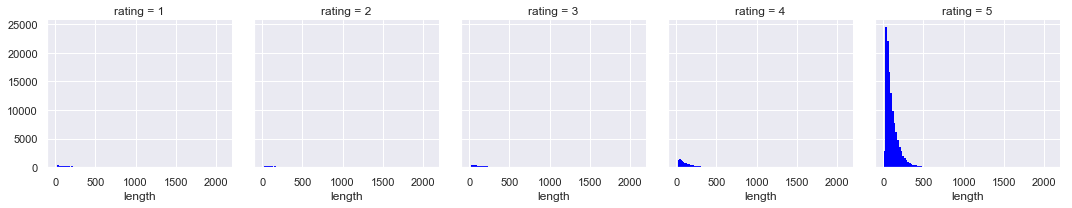

In [12]:

g = sns.FacetGrid(data=review2, col='rating')
g.map(plt.hist, 'length', color='blue', bins=100)

In [13]:
review2['rating'].value_counts() 

5    123383
4     12334
1      4437
3      4377
2      2980
Name: rating, dtype: int64

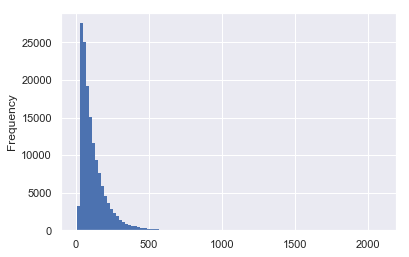

In [14]:
review2['length'].plot.hist(bins=100)
#comments1['length'].describe()

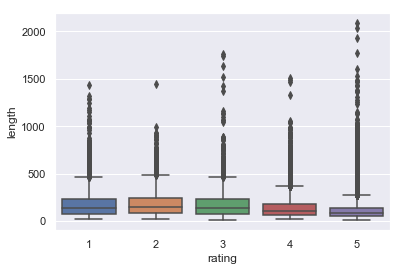

In [15]:
sns.boxplot(x='rating', y='length', data=review2)

In [16]:
rating = review2.groupby('rating').mean()
rating.corr()

,review_count,comment_count,length
review_count,1.000000,0.987865,-0.958182
comment_count,0.987865,1.000000,-0.983445
length,-0.958182,-0.983445,1.000000


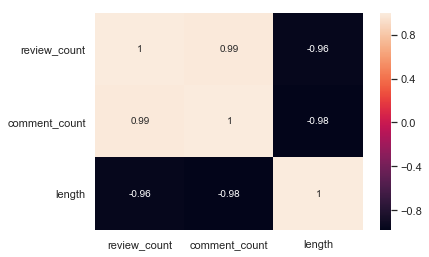

In [17]:
sns.heatmap(data=rating.corr(), annot=True)

In [18]:
review2.head()

,SKU,review_count,comment_count,rating,text,length
0,401684,23,5,5,Great for kids and dips and spices,34
1,401684,23,5,5,Love this sturdy and perfect sized ramekin.\r\...,268
2,401684,23,5,5,exactly what I was looking for.,31
3,401684,23,5,5,I got these to make small servings of creme br...,75
4,401684,23,5,5,Perfect size for decadent desserts!,35


In [19]:
review2_rate_1_2 = review2[(review2['rating'] == 1) | (review2['rating'] == 2)]
review2_rate_1_2.shape

(7417, 6)

In [20]:
review2_rate_1_2['rating'] = review2_rate_1_2['rating'].replace(2,1)
review2_rate_1_2['rating'].value_counts()


1    7417
Name: rating, dtype: int64

In [21]:
review2_rate_5 = review2[(review2['rating'] == 5)]
review2_rate_5.shape

(123383, 6)

In [22]:
review2_rate5_sample = review2_rate_5.sample(frac=0.09, random_state=89)

In [23]:
review2_rate5_sample.shape

(11104, 6)

In [24]:
review2_rate5_sample.head()

,SKU,review_count,comment_count,rating,text,length
23319,2871654,7,0,5,Great sturdy lamp Goes well with the rest of ...,86
57218,3138722,25,0,5,Love the scent it just right,28
120058,3593680,8,1,5,These amber napkin rings are great for setting...,89
131494,3653450,29,15,5,"My Santa was a gift from my son, he's gotten m...",287
1575,2279518,19,9,5,Libertine color and design of these glasses. ...,102


In [25]:
Final = review2_rate_1_2.append(review2_rate5_sample, ignore_index=True)
Final.shape

(18521, 6)

In [26]:
Final.reset_index(inplace=True, drop = True)
#Final.sort_values(by = 'SKU',inplace=True)
Final.head()

,SKU,review_count,comment_count,rating,text,length
0,843940,6,0,1,I have returned the sets of chair covers.,41
1,843940,6,0,1,Did not fit-had to return. My chair was older ...,70
2,1672605,9,8,1,Not crazy about this sphere. I have about 7. ...,101
3,2043879,8,1,1,"Stunning piece of art, love it",30
4,2069836,7,0,1,"We've only owned it for a couple months, but w...",177


In [28]:
# Final.drop(['level_0','index'],axis = 1, inplace = True)
# Final.head()

In [29]:
# reshuffle rows
Final = Final.sample(frac=1).reset_index(drop=True)
Final.head()

,SKU,review_count,comment_count,rating,text,length
0,3116001,68,24,5,Very unique table. Perfect size. Have received...,79
1,2983984,31,20,5,"Beautiful look, sturdy, and a nice, wide table.",47
2,3157876,17,11,5,Beautiful & very solid construction!,36
3,3653146,11,2,5,The mini size is perfect for my office.\r\nThe...,81
4,3119140,46,15,1,"It didn't smell strong in store, but when I pl...",119


In [30]:
Final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18521 entries, 0 to 18520
Data columns (total 6 columns):
SKU              18521 non-null object
review_count     18521 non-null int64
comment_count    18521 non-null int64
rating           18521 non-null int64
text             18521 non-null object
length           18521 non-null int64
dtypes: int64(4), object(2)
memory usage: 868.2+ KB


In [31]:
#### Model Building starts

X = Final['text']
y = Final['rating']

In [32]:
X[0]

'Very unique table. Perfect size. Have received many compliments on it. Love it!'

In [33]:
import string
from nltk.corpus import stopwords

In [178]:

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Himanshu
[nltk_data]     Rustagi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [180]:
#stopwords.words('english')

In [34]:
#bag of words approach

def text_process(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]


In [35]:
sample_text = "Hey there! This is a sample review, which happens to contain punctuations."

print(text_process(sample_text))
#Output: ['Hey', 'sample', 'review', 'happens', 'contain', 'punctuations']

['Hey', 'sample', 'review', 'happens', 'contain', 'punctuations']


In [36]:
Final['text'].head(5).apply(text_process)

0    [unique, table, Perfect, size, received, many,...
1         [Beautiful, look, sturdy, nice, wide, table]
2                     [Beautiful, solid, construction]
3    [mini, size, perfect, office, scent, great, ov...
4    [didnt, smell, strong, store, plugged, overpow...
Name: text, dtype: object

In [106]:
#clean_list = Final['text'].apply(text_process)

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

In [38]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(X)

In [105]:
#bow_transformer

sklearn.feature_extraction.text.CountVectorizer

In [39]:
len(bow_transformer.vocabulary_)

16192

In [41]:
review_25 =X[24]
review_25

'falls apart doesnt hold up   i bought 2 and 1 is already  falling apart to where i cant use again'

In [42]:
bow_25 = bow_transformer.transform([review_25])
bow_25

<1x16192 sparse matrix of type '<class 'numpy.int64'>'
	with 11 stored elements in Compressed Sparse Row format>

In [43]:
X = bow_transformer.transform(X)

<18521x16192 sparse matrix of type '<class 'numpy.int64'>'
	with 228338 stored elements in Compressed Sparse Row format>

In [44]:
X.shape

(18521, 16192)

In [45]:
X.nnz

228338

In [46]:
print('Shape of Sparse Matrix: ', X.shape)
print('Amount of Non-Zero occurrences: ', X.nnz)
# Percentage of non-zero values
density = (100.0 * X.nnz / (X.shape[0] * X.shape[1]))
density
#print(‘Density: {}’.format((density)))

Shape of Sparse Matrix:  (18521, 16192)
Amount of Non-Zero occurrences:  228338


0.07614006896988847

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [48]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [49]:
preds = nb.predict(X_test)

In [50]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, preds))

[[1937  308]
 [ 222 3090]]


              precision    recall  f1-score   support

           1       0.90      0.86      0.88      2245
           5       0.91      0.93      0.92      3312

   micro avg       0.90      0.90      0.90      5557
   macro avg       0.90      0.90      0.90      5557
weighted avg       0.90      0.90      0.90      5557



In [51]:
positive_review = Final['text'][59]
positive_review

'This set is really so beautiful and looks so authentic. The edging and details give a hand made look, and the color is spot on.'

In [52]:
positive_review_transformed = bow_transformer.transform([positive_review])
nb.predict(positive_review_transformed)[0]

5

In [60]:
negative_review = Final['text'][4571]
negative_review

"Not the same as Vanilla Creme, a favorite of mine. You just can't smell this one. Also, it's spiced not warm smelling like the old one. I won't purchase again."

In [61]:
negative_review_transformed = bow_transformer.transform([negative_review])
nb.predict(negative_review_transformed)[0]

1

In [87]:
negative_review1 = review2['text'][17683]
negative_review1

'This pillow looks beautiful but is not particularly useful as the "stuffing" is a poor quality - great for decoration only'

In [88]:
negative_review_transformed = bow_transformer.transform([negative_review1])
nb.predict(negative_review_transformed)[0]

1

In [89]:
feature_to_coef = {
    word: coef for word, coef in zip(
        bow_transformer.get_feature_names(), nb.coef_[0]
    )
}

for best_positive in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1], 
    reverse=True)[:5]:
    print (best_positive)

('love', -3.9776567058586654)
('Love', -4.299837612369123)
('great', -4.537272493794088)
('beautiful', -4.682780077465327)
('perfect', -4.723008965688112)


In [102]:
for best_negative in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1])[202:250]:
    print (best_negative)
    

('ABSURD', -11.499515958060295)
('ACHIEVED', -11.499515958060295)
('ACTUAL', -11.499515958060295)
('ACTUALLY', -11.499515958060295)
('ADDS', -11.499515958060295)
('ADORABLEHOWEVER', -11.499515958060295)
('ADVISED', -11.499515958060295)
('AFRAID', -11.499515958060295)
('AKA', -11.499515958060295)
('ALMOST', -11.499515958060295)
('ALOT', -11.499515958060295)
('AMAZING', -11.499515958060295)
('AMU', -11.499515958060295)
('ANGEL', -11.499515958060295)
('ANGELS', -11.499515958060295)
('ANYONE', -11.499515958060295)
('ANYWHERE', -11.499515958060295)
('APO', -11.499515958060295)
('APPEARS', -11.499515958060295)
('AROMA', -11.499515958060295)
('AROUND', -11.499515958060295)
('ARRIVED', -11.499515958060295)
('ARROW', -11.499515958060295)
('ASAP', -11.499515958060295)
('ASAPat', -11.499515958060295)
('ASSEMBLE', -11.499515958060295)
('ASSEMBLED', -11.499515958060295)
('ASSEMBLY', -11.499515958060295)
('ASTOUNDING', -11.499515958060295)
('AV', -11.499515958060295)
('AVOID', -11.499515958060295)
(

### Single Word frequencies, bigrams and trigrams frequencies for rating 1 and 2

In [203]:
review2_rate_1_2.head()

,SKU,review_count,comment_count,rating,text,length
27,843940,6,0,1,I have returned the sets of chair covers.,41
28,843940,6,0,1,Did not fit-had to return. My chair was older ...,70
31,1672605,9,8,1,Not crazy about this sphere. I have about 7. ...,101
125,2043879,8,1,1,"Stunning piece of art, love it",30
189,2069836,7,0,1,"We've only owned it for a couple months, but w...",177


In [208]:
lower_rating = review2_rate_1_2.reset_index(drop= True)
lower_rating.head()

,SKU,review_count,comment_count,rating,text,length
0,843940,6,0,1,I have returned the sets of chair covers.,41
1,843940,6,0,1,Did not fit-had to return. My chair was older ...,70
2,1672605,9,8,1,Not crazy about this sphere. I have about 7. ...,101
3,2043879,8,1,1,"Stunning piece of art, love it",30
4,2069836,7,0,1,"We've only owned it for a couple months, but w...",177


In [209]:
lower_rating.shape

(7417, 6)

In [210]:
clean_list = lower_rating['text'].apply(text_process)

In [212]:
clean_list[0]

['returned', 'sets', 'chair', 'covers']

In [213]:
def word_freq(clean_list1):
    """Return a dictionary of word frequencies for the given text.
    Input text should be given as an iterable of strings."""

    freqs = {}
    for text in clean_list1:
        for word in text:
            if word in freqs.keys():
                freqs[word] = freqs[word] + 1
                
            else:
                freqs[word] =  1    
    return freqs

In [214]:
word_count = word_freq(clean_list)

In [215]:
word_count

{'returned': 475,
 'sets': 60,
 'chair': 482,
 'covers': 29,
 'fithad': 1,
 'return': 427,
 'older': 13,
 'model': 9,
 'wider': 10,
 'frame': 121,
 'crazy': 30,
 'sphere': 2,
 '7': 28,
 'coming': 113,
 'apart': 239,
 'strong': 157,
 'odor': 22,
 'Stunning': 1,
 'piece': 269,
 'art': 39,
 'love': 598,
 'Weve': 8,
 'owned': 20,
 'couple': 130,
 'months': 247,
 'sunlight': 23,
 'shines': 2,
 'covered': 67,
 'scratches': 34,
 'someone': 50,
 'else': 60,
 'already': 204,
 'pointed': 3,
 'also': 221,
 'shows': 41,
 'smear': 1,
 'marks': 27,
 'well': 358,
 'Stool': 1,
 'perfect': 176,
 'height': 30,
 'size': 238,
 'put': 419,
 'feet': 33,
 'Yes': 16,
 'looks': 553,
 'functional': 28,
 'it’s': 174,
 'Wine': 2,
 'bottles': 26,
 'bottom': 134,
 'rack': 21,
 'fit': 211,
 'needs': 56,
 'elevated': 1,
 'Tried': 30,
 'hard': 148,
 '12': 56,
 'pieces': 219,
 'Ended': 13,
 'returning': 217,
 'many': 158,
 'due': 68,
 'perfections': 1,
 'bought': 695,
 'dinner': 34,
 'plates': 100,
 'salad': 23,
 'prob

In [217]:
len(word_count)

10989

In [218]:
df = pd.DataFrame.from_dict(word_count,orient='index')
df.head()

,0
returned,475
sets,60
chair,482
covers,29
fithad,1


In [219]:
df.reset_index(inplace = True)

In [220]:
df.columns = ['word','freq']

In [221]:
df_word_freq = df.sort_values('freq',ascending=False).reset_index(drop=True)
df_word_freq.head()

,word,freq
0,one,1157
1,like,1093
2,would,1027
3,disappointed,949
4,look,757


In [223]:
frecount_25 = df_word_freq.head(25)

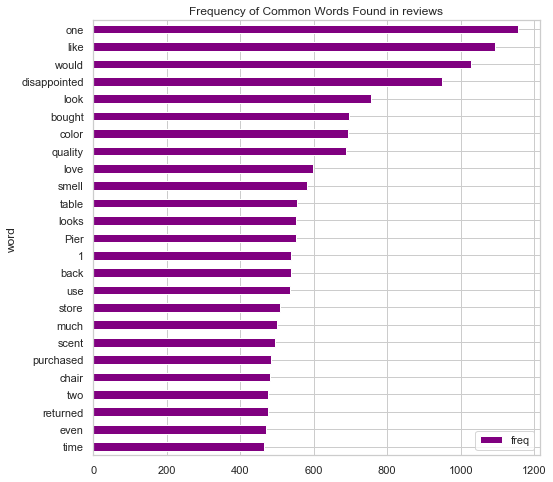

In [224]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
frecount_25.sort_values(by='freq').plot.barh(x='word',
                      y='freq',
                      ax=ax,
                      color="purple")

ax.set_title("Frequency of Common Words Found in reviews")

plt.show()

In [225]:
from nltk import bigrams

In [226]:
clean_list[0]

['returned', 'sets', 'chair', 'covers']

In [227]:
# Create list of lists containing bigrams
terms_bigram = [list(bigrams(word)) for word in clean_list]

# View bigrams for the first review
terms_bigram[0]

[('returned', 'sets'), ('sets', 'chair'), ('chair', 'covers')]

In [228]:
lower_rating['text'][0]

'I have returned the sets of chair covers.'

In [229]:
terms_bigram[1]

[('fithad', 'return'),
 ('return', 'chair'),
 ('chair', 'older'),
 ('older', 'model'),
 ('model', 'wider'),
 ('wider', 'frame')]

In [230]:
lower_rating['text'][1]

'Did not fit-had to return. My chair was older model with wider frame. '

In [231]:
import itertools
import collections

In [239]:
# Flatten list of bigrams
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

bigram_counts.most_common(30)

[(('Pier', '1'), 381),
 (('waste', 'money'), 124),
 (('Pier', 'One'), 116),
 (('looks', 'like'), 101),
 (('would', 'recommend'), 95),
 (('look', 'like'), 93),
 (('poor', 'quality'), 88),
 (('put', 'together'), 78),
 (('worth', 'money'), 68),
 (('years', 'ago'), 67),
 (('nothing', 'like'), 67),
 (('thought', 'would'), 66),
 (('like', 'picture'), 65),
 (('falling', 'apart'), 65),
 (('cheaply', 'made'), 63),
 (('back', 'store'), 58),
 (('living', 'room'), 58),
 (('first', 'time'), 58),
 (('better', 'quality'), 50),
 (('love', 'look'), 49),
 (('bought', 'two'), 48),
 (('last', 'long'), 48),
 (('looks', 'great'), 48),
 (('disappointed', 'quality'), 48),
 (('looked', 'like'), 48),
 (('poorly', 'made'), 47),
 (('got', 'home'), 46),
 (('2', 'weeks'), 45),
 (('Would', 'recommend'), 45),
 (('stopped', 'working'), 45)]

In [240]:
bigram_df = pd.DataFrame(bigram_counts.most_common(30),
                             columns=['bigram', 'count'])

bigram_df

,bigram,count
0,"(Pier, 1)",381
1,"(waste, money)",124
2,"(Pier, One)",116
3,"(looks, like)",101
4,"(would, recommend)",95
5,"(look, like)",93
6,"(poor, quality)",88
7,"(put, together)",78
8,"(worth, money)",68
9,"(years, ago)",67


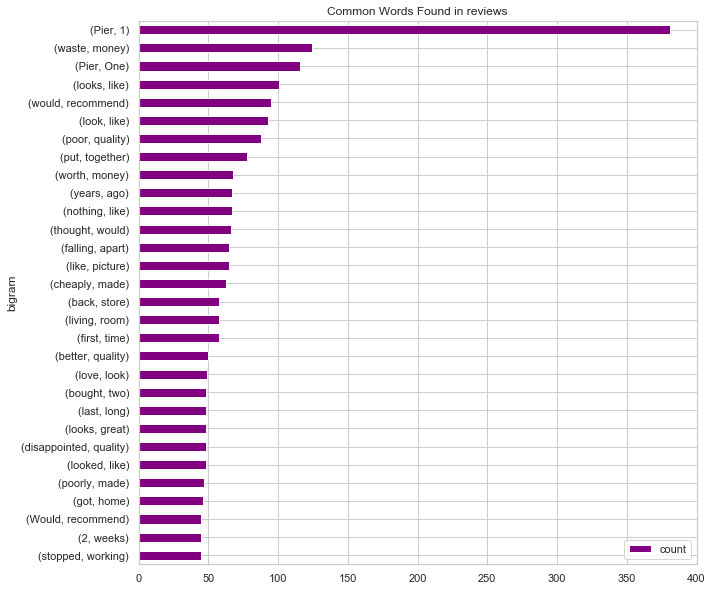

In [243]:
fig, ax = plt.subplots(figsize=(10, 10))

# Plot horizontal bar graph
bigram_df.sort_values(by='count').plot.barh(x='bigram',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in reviews")

plt.show()

In [244]:
import re
import networkx as nx

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1)
sns.set_style("whitegrid")

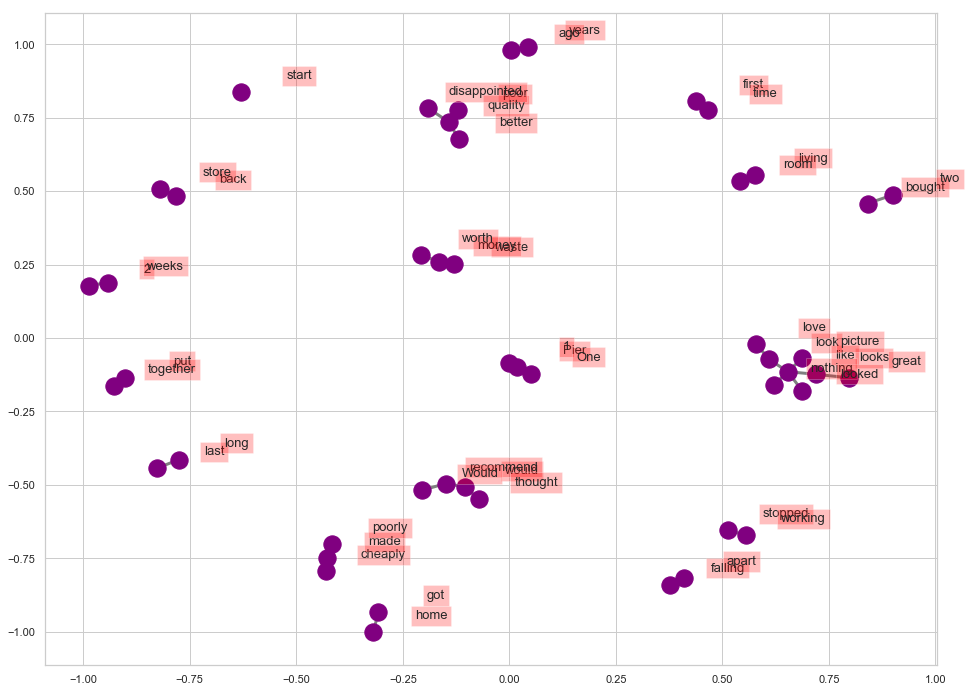

In [261]:

# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

G.add_node("start", weight=100)
fig, ax = plt.subplots(figsize=(16, 12))

pos = nx.spring_layout(G, k=1)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()

In [252]:
from nltk import trigrams

In [253]:
# Create list of lists containing trigrams
terms_trigram = [list(trigrams(word)) for word in clean_list]

# View trigrams for the first review
terms_trigram[0]

[('returned', 'sets', 'chair'), ('sets', 'chair', 'covers')]

In [255]:
# Flatten list of trigrams 
trigrams = list(itertools.chain(*terms_trigram))

# Create counter of words in clean trigrams
trigram_counts = collections.Counter(trigrams)

trigram_counts.most_common(30)

[(('nothing', 'like', 'picture'), 25),
 (('looks', 'nothing', 'like'), 22),
 (('Dont', 'waste', 'money'), 20),
 (('love', 'Pier', '1'), 18),
 (('would', 'recommend', 'product'), 15),
 (('disappointed', 'Pier', '1'), 14),
 (('dining', 'room', 'table'), 14),
 (('took', 'back', 'store'), 13),
 (('2', 'years', 'ago'), 12),
 (('look', 'like', 'picture'), 12),
 (('quality', 'Pier', '1'), 11),
 (('purchased', 'Pier', '1'), 11),
 (('first', 'time', 'used'), 11),
 (('Pier', '1', 'candles'), 10),
 (('local', 'Pier', '1'), 10),
 (('look', 'anything', 'like'), 10),
 (('expected', 'better', 'quality'), 9),
 (('4', 'years', 'ago'), 9),
 (('really', 'wanted', 'love'), 9),
 (('bought', 'Pier', '1'), 8),
 (('better', 'quality', 'Pier'), 8),
 (('online', 'picked', 'store'), 8),
 (('Pier', '1', 'would'), 8),
 (('furniture', 'Pier', '1'), 8),
 (('Don’t', 'waste', 'money'), 8),
 (('Definitely', 'worth', 'money'), 8),
 (('anything', 'like', 'picture'), 8),
 (('much', 'better', 'quality'), 7),
 (('3', 'years

In [256]:
trigram_df = pd.DataFrame(trigram_counts.most_common(30),
                             columns=['trigram', 'count'])

trigram_df

,trigram,count
0,"(nothing, like, picture)",25
1,"(looks, nothing, like)",22
2,"(Dont, waste, money)",20
3,"(love, Pier, 1)",18
4,"(would, recommend, product)",15
5,"(disappointed, Pier, 1)",14
6,"(dining, room, table)",14
7,"(took, back, store)",13
8,"(2, years, ago)",12
9,"(look, like, picture)",12


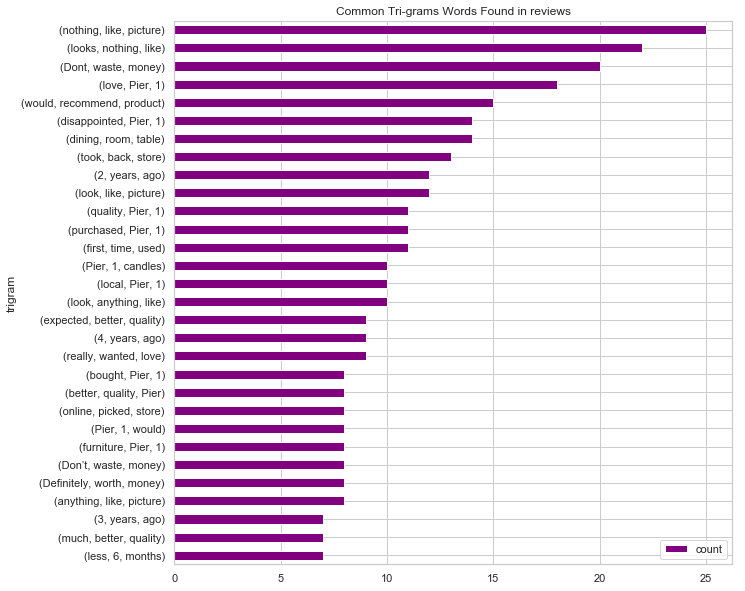

In [257]:
fig, ax = plt.subplots(figsize=(10, 10))

# Plot horizontal bar graph
trigram_df.sort_values(by='count').plot.barh(x='trigram',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Tri-grams Words Found in reviews")

plt.show()